# Business objective : A telecom Giant have the customer data over last 3 years and they want us to target three major goals : 
- Understand the Customer Clusters and do the necessary EDA over the different dimensions ?
- Perform the ETL operations on the data 
- Build a Churn Model with minimum 95% accuracy to replace the current model in action. 



### Task1 : And prepare a data dictionary : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
data=pd.read_csv("Customer-Churn.csv")
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# EXPLORATORY DATA ANALYSIS

In [4]:
# take care of senior citizen variable .. as it is int by default . change it later to categorical . taken care - 
# data is imbalanced . churn data is only 26.6% only as compared to 73.4% non churned . 
# i have to correct Total charges as it is a string data but actually it is numerical . # this is sorted as of now. 
# missing values only in Totalcharges ( 11 of them ) : We have to treat it 
# 
 #

In [5]:
# Step1 : healthcheckup of data . 

In [6]:
data.describe(percentiles=[0.02,.25,.50,.75,.89,.90,.98])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
2%,0.0000,1.0000,19.3500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
89%,1.0000,68.0000,101.1500
90%,1.0000,69.0000,102.6000


In [7]:
# data conversion ke liye use astype 
data['SeniorCitizen']=data['SeniorCitizen'].astype('str')

In [8]:
data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
print("Churn proportion is ==> ",(round(data['Churn'].value_counts()[1]/data.shape[0]*100,3)),"%")
print("Non Churn proportion is ==> ",100 - (round(data['Churn'].value_counts()[1]/data.shape[0]*100,3)),"%")

Churn proportion is ==>  26.537 %
Non Churn proportion is ==>  73.463 %


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

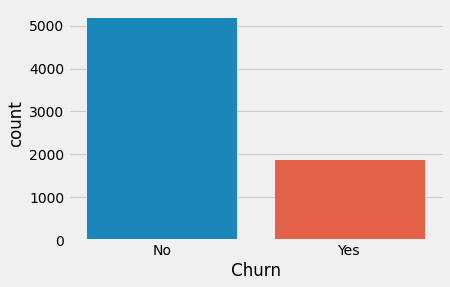

In [11]:
sns.countplot('Churn',data=data)

In [12]:
data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
614.45      1
2545.75     1
138.85      1
4541.2      1
6895.5      1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)
data['TotalCharges']=data['TotalCharges'].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# SeniorCitizen	tenure	MonthlyCharges	TotalCharges

### Density distribution .. Histogram 
- TotalCharges distribution 

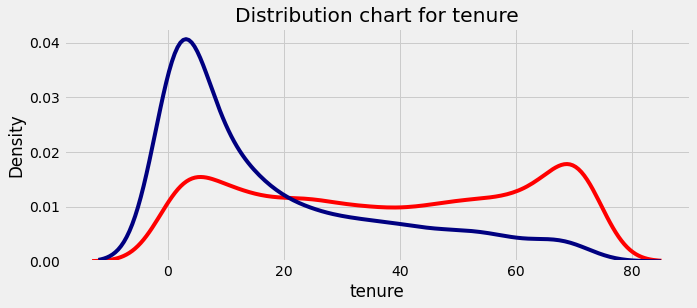

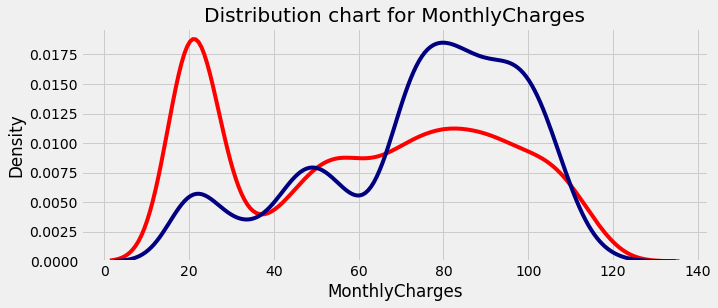

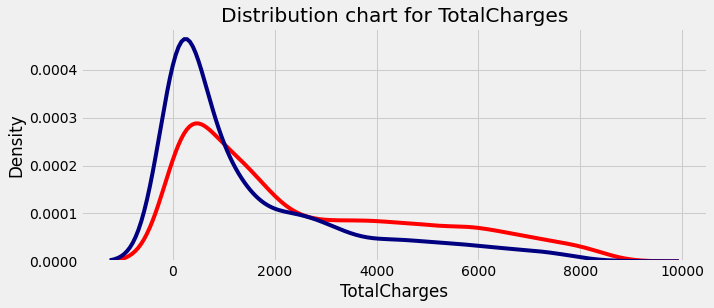

In [17]:
def plot_dist(feature):
    plt.figure(figsize=(10,4))
    plt.title("Distribution chart for {}".format(feature))
    sns.kdeplot(data[data['Churn']=='No'][feature],color='red',label='Churn - No')
    sns.kdeplot(data[data['Churn']=='Yes'][feature],color='navy',label='Churn - Yes')
plot_dist('tenure')
plot_dist('MonthlyCharges')
plot_dist('TotalCharges')

# interpret these plots and write down observations  : Feature engineering mein help hoga !!

## Univariate Analysis through Countplots with  Churn variable
- Dependents 
- gender
- Seniorcitizen 
- Phoneservice 
- Paperlessbiling

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

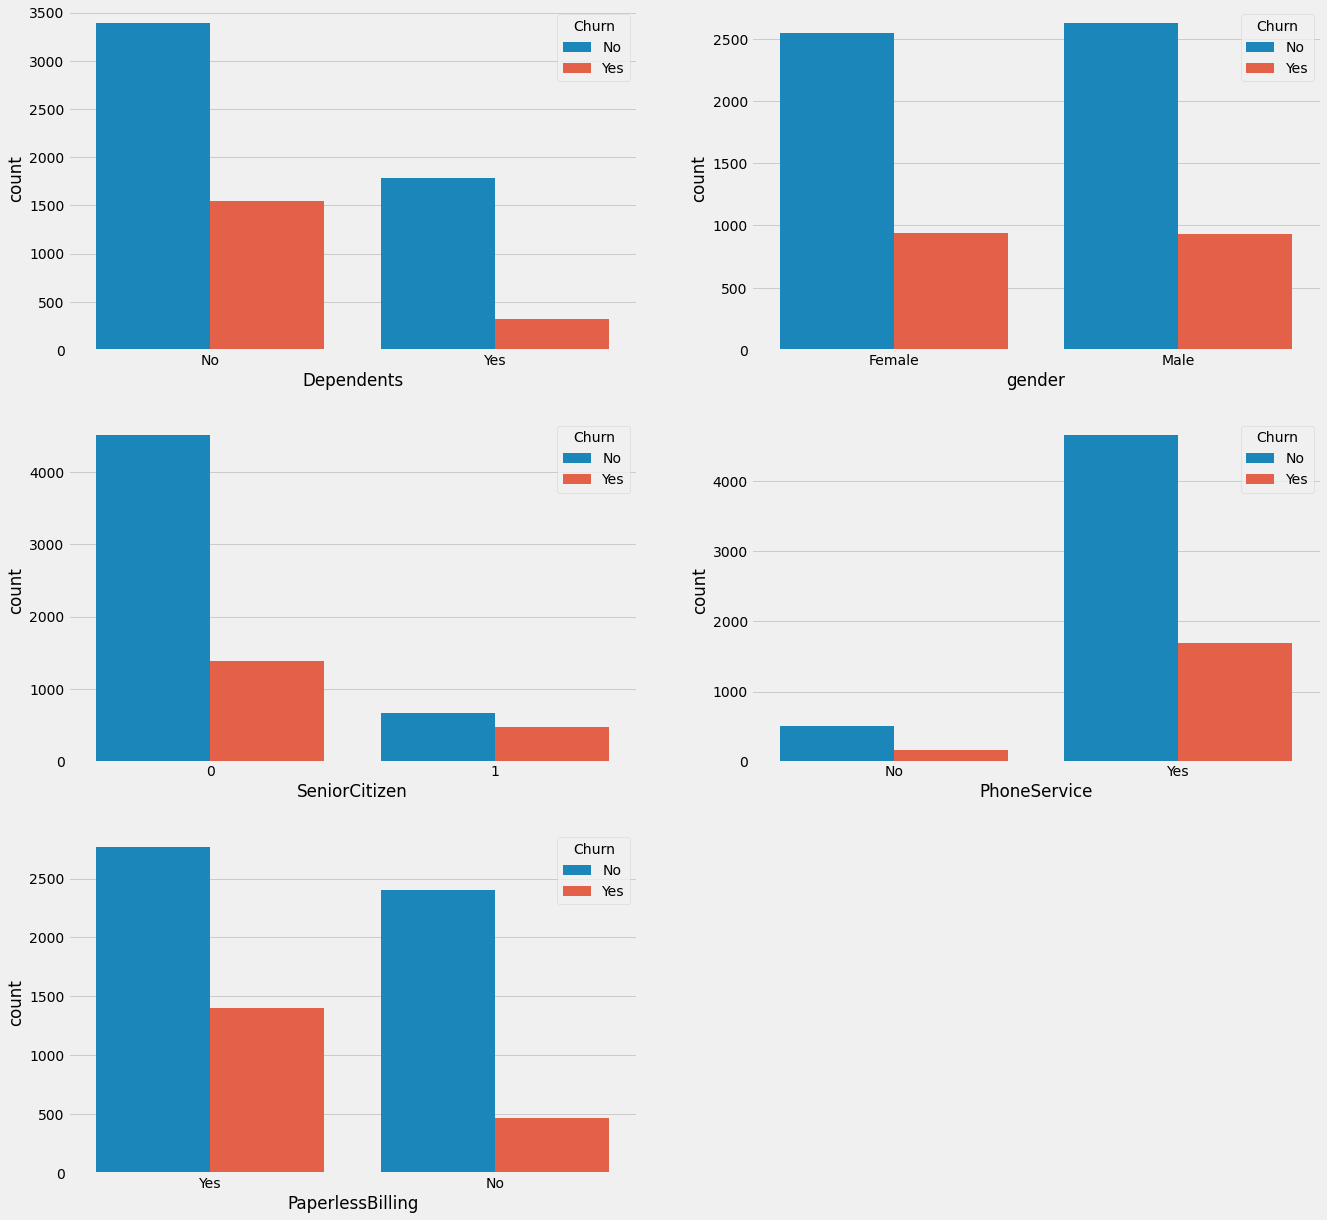

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.countplot('Dependents',hue='Churn',data=data)
plt.subplot(3,2,2)
sns.countplot('gender',hue='Churn',data=data)
plt.subplot(3,2,3)
sns.countplot('SeniorCitizen',hue='Churn',data=data)
plt.subplot(3,2,4)
sns.countplot('PhoneService',hue='Churn',data=data)
plt.subplot(3,2,5)
sns.countplot('PaperlessBilling',hue='Churn',data=data)

# write down the obesevations what you analyze : 

In [19]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No


# Histogram and bins analysis of Numerical columns : 
- Tasks : Note down the interesting things from the graphs.

Text(0.5, 0, 'Yearly Payments  ')

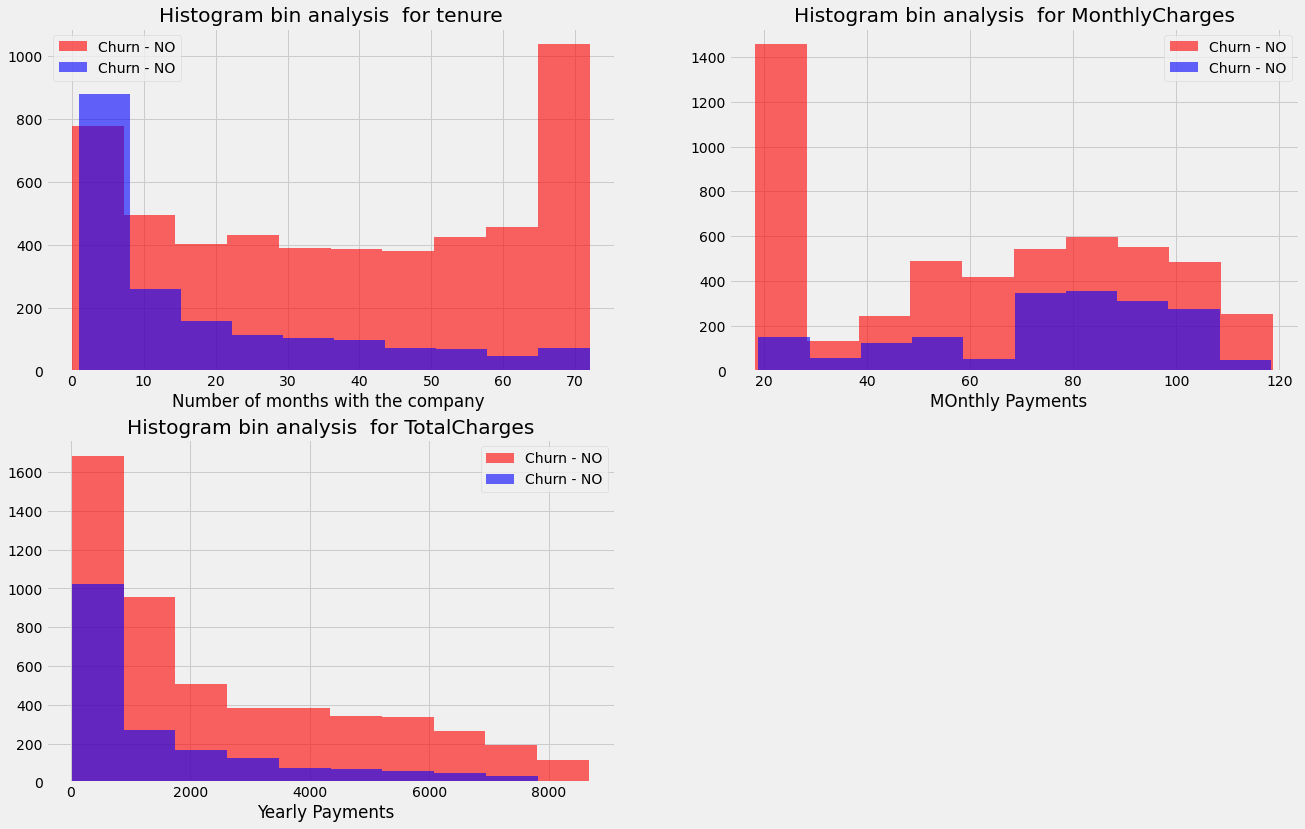

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title("Histogram bin analysis  for {}".format('tenure'))
data[data['Churn']=='No']['tenure'].hist(bins=10,alpha=0.6,label='Churn - NO',color='red')
data[data['Churn']=='Yes']['tenure'].hist(bins=10,alpha=0.6,label='Churn - NO',color='blue')
plt.legend()
plt.xlabel('Number of months with the company ')

plt.subplot(3,2,2)
plt.title("Histogram bin analysis  for {}".format('MonthlyCharges'))
data[data['Churn']=='No']['MonthlyCharges'].hist(bins=10,alpha=0.6,label='Churn - NO',color='red')
data[data['Churn']=='Yes']['MonthlyCharges'].hist(bins=10,alpha=0.6,label='Churn - NO',color='blue')
plt.legend()
plt.xlabel('MOnthly Payments  ')

plt.subplot(3,2,3)
plt.title("Histogram bin analysis  for {}".format('TotalCharges'))
data[data['Churn']=='No']['TotalCharges'].hist(bins=10,alpha=0.6,label='Churn - NO',color='red')
data[data['Churn']=='Yes']['TotalCharges'].hist(bins=10,alpha=0.6,label='Churn - NO',color='blue')
plt.legend()
plt.xlabel('Yearly Payments  ')


In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

[Text(0, 0, 'Electronic check'),
 Text(1, 0, 'Mailed check'),
 Text(2, 0, 'Bank transfer (automatic)'),
 Text(3, 0, 'Credit card (automatic)')]

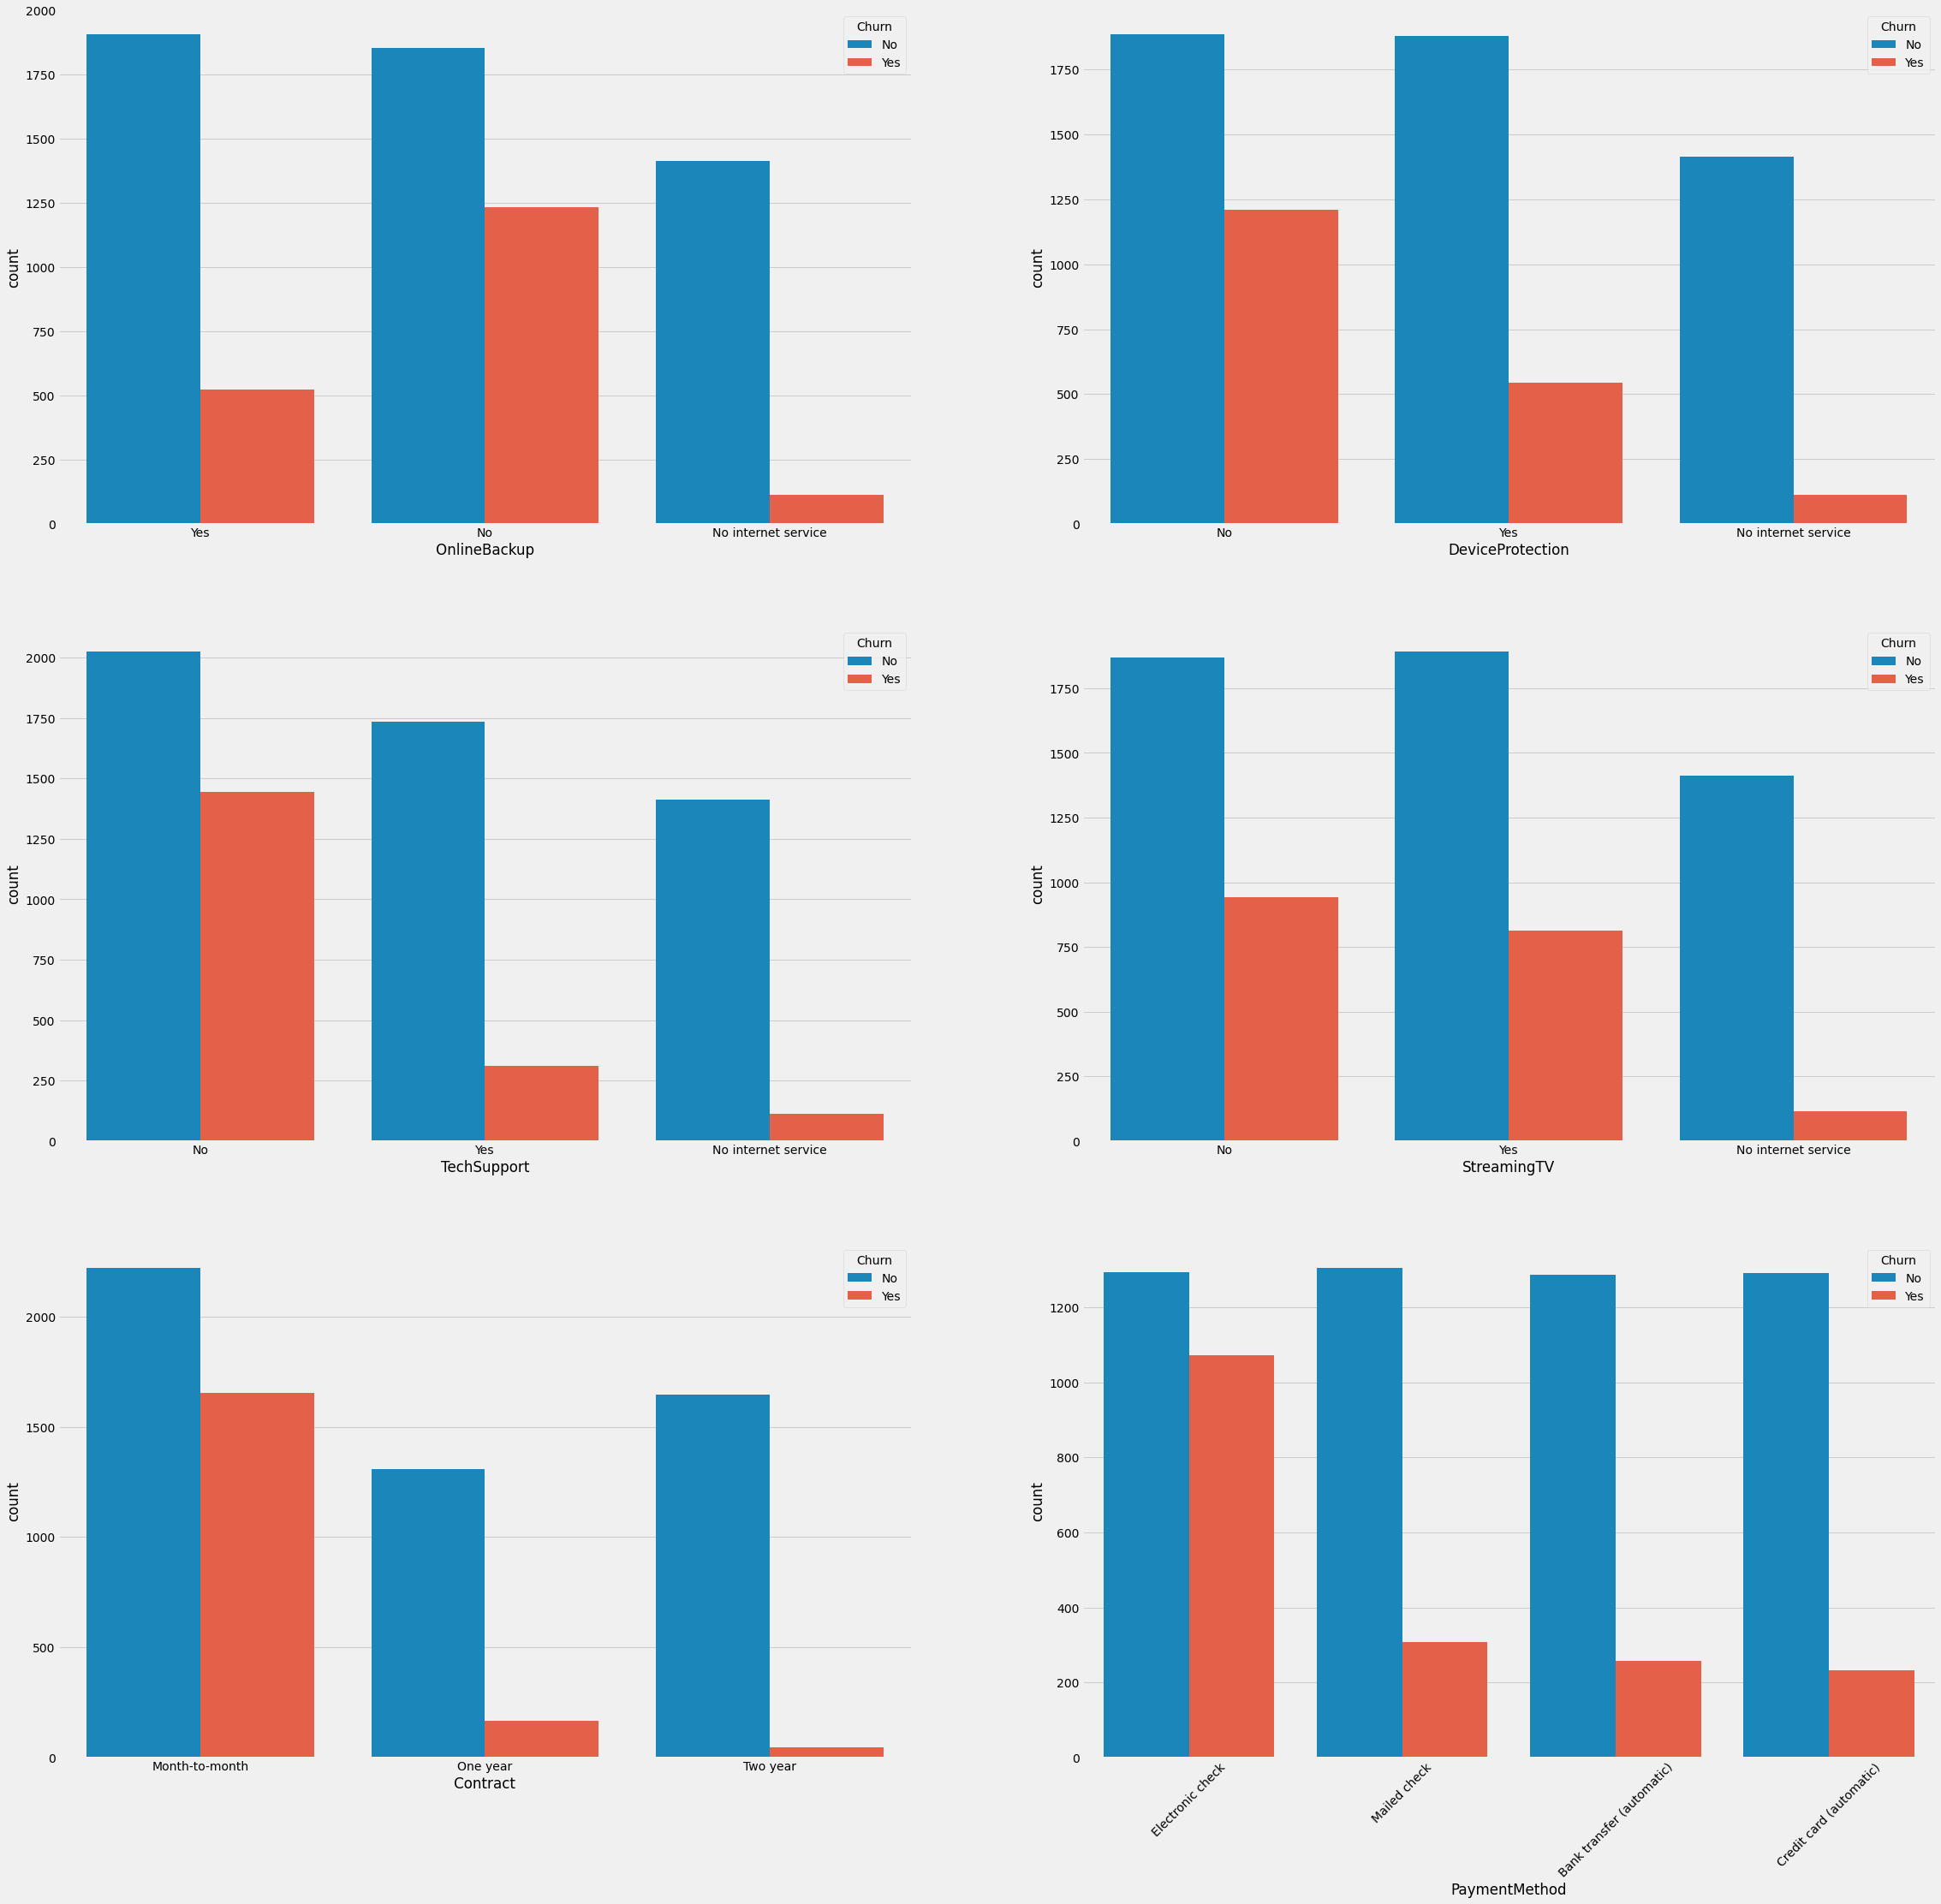

In [22]:
plt.figure(figsize=(35,35))
plt.subplot(3,2,1)
sns.countplot('OnlineBackup',hue='Churn',data=data)
plt.subplot(3,2,2)
sns.countplot('DeviceProtection',hue='Churn',data=data)
plt.subplot(3,2,3)
sns.countplot('TechSupport',hue='Churn',data=data)
plt.subplot(3,2,4)
sns.countplot('StreamingTV',hue='Churn',data=data)
plt.subplot(3,2,5)
sns.countplot('Contract',hue='Churn',data=data)
plt.subplot(3,2,6)
h=sns.countplot('PaymentMethod',hue='Churn',data=data)
h.set_xticklabels(h.get_xticklabels(),rotation=45)


# write down the obesevations what you analyze : 

#  Feature Engineering : 
 - Resolved the missing values in Monthly charges

In [23]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.0000,7043.0000,7032.0000
mean,32.3711,64.7617,2283.3004
std,24.5595,30.0900,2266.7714
min,0.0000,18.2500,18.8000
25%,9.0000,35.5000,401.4500
50%,29.0000,70.3500,1397.4750
75%,55.0000,89.8500,3794.7375
max,72.0000,118.7500,8684.8000


# Imputation methods assumptions : 
- Impute TotalCharges with Median values - iteration 1 
 - Merge no internet service to No and make it binary class to keep things simple. - Done for the moment. 
    

In [25]:
data['TotalCharges']=data['TotalCharges'].fillna(value=data['TotalCharges'].median())

In [26]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


In [27]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [28]:
data['OnlineSecurity']=data['OnlineSecurity'].replace({'No internet service':'No'})
data['OnlineBackup']=data['OnlineBackup'].replace({'No internet service':'No'})
data['DeviceProtection']=data['DeviceProtection'].replace({'No internet service':'No'})
data['TechSupport']=data['TechSupport'].replace({'No internet service':'No'})
data['StreamingTV']=data['StreamingTV'].replace({'No internet service':'No'})
data['StreamingMovies']=data['StreamingMovies'].replace({'No internet service':'No'})

#### Binary Columns : 
- One Hot envoding Idea ( to create features from the classes within a variable. )

In [29]:
data['gender']=data.gender.map({'Male':1,'Female':0})

In [30]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No


In [31]:
columns=['Partner','Dependents','PhoneService','OnlineSecurity', 'OnlineBackup','DeviceProtection',
         'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in columns:
    data[col]=data[col].map({'Yes':1,'No':0})

In [32]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.8500,29.8500,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.9500,1889.5000,0


In [33]:
def convert_tenure(x):
    if x<=12:
        return 1
    elif(x>12) & (x<=24):
        return 2
    elif(x>24) & (x<=36):
        return 3
    elif(x>36) & (x<=48):
        return 4
    elif(x>48) & (x<=60):
        return 5
    elif(x>60):
        return 6

In [34]:
data['tenure']=data['tenure'].apply(convert_tenure)

In [35]:
data['tenure'].value_counts()

1    2186
6    1407
2    1024
5     832
3     832
4     762
Name: tenure, dtype: int64

In [36]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.8500,29.8500,0
1,5575-GNVDE,1,0,0,0,3,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.9500,1889.5000,0


In [37]:
# # Dummy variables : 
# If i have 3 categories within this column  multiplelines : 
#     - i can create N-1 ( it means 3-1 = 2 new columns i can create as dummy )
#     - Multiplelines_No_phone_service == 1 , 0 
#     - Multiplelines_No ==> 1 , 0 
    

In [38]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [39]:
dummy_col=['MultipleLines','InternetService','Contract','PaymentMethod']
data1=pd.get_dummies(data,columns=dummy_col,drop_first=True,dtype='uint8')
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,0,0,0,1,29.8500,29.8500,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,3,1,1,0,1,0,0,0,0,56.9500,1889.5000,0,0,0,0,0,1,0,0,0,1


In [40]:
# Correlation Analysis : Since i want to know.. what all variables are correlated to each other . 

In [41]:
data1.corr()

,gender,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.0000,-0.0018,0.0105,0.0058,-0.0065,-0.0170,-0.0138,-0.0021,-0.0092,-0.0084,-0.0105,-0.0118,-0.0146,-0.0000,-0.0086,0.0065,-0.0084,-0.0113,0.0060,0.0080,-0.0037,0.0012,0.0008,0.0137
Partner,-0.0018,1.0000,0.4527,0.3680,0.0177,0.1431,0.1415,0.1538,0.1200,0.1247,0.1174,-0.0149,0.0968,0.3184,-0.1504,-0.0177,0.1421,0.0003,0.0006,0.0828,0.2481,0.0820,-0.0839,-0.0951
Dependents,0.0105,0.4527,1.0000,0.1543,-0.0018,0.0810,0.0237,0.0140,0.0633,-0.0166,-0.0397,-0.1114,-0.1139,0.0636,-0.1642,0.0018,-0.0245,-0.1658,0.1398,0.0684,0.2046,0.0603,-0.1506,0.0591
tenure,0.0058,0.3680,0.1543,1.0000,0.0080,0.3172,0.3552,0.3513,0.3160,0.2728,0.2788,0.0048,0.2428,0.8169,-0.3388,-0.0080,0.3238,0.0207,-0.0391,0.2064,0.5437,0.2277,-0.2032,-0.2276
PhoneService,-0.0065,0.0177,-0.0018,0.0080,1.0000,-0.0929,-0.0523,-0.0712,-0.0963,-0.0226,-0.0330,0.0165,0.2474,0.1130,0.0119,-1.0000,0.2797,0.2900,0.1722,-0.0028,0.0035,-0.0077,0.0031,-0.0033
OnlineSecurity,-0.0170,0.1431,0.0810,0.3172,-0.0929,1.0000,0.2838,0.2754,0.3549,0.1762,0.1874,-0.0036,0.2966,0.4121,-0.1712,0.0929,0.0981,-0.0307,-0.3334,0.1002,0.1918,0.1157,-0.1123,-0.0808
OnlineBackup,-0.0138,0.1415,0.0237,0.3552,-0.0523,0.2838,1.0000,0.3035,0.2942,0.2821,0.2745,0.1267,0.4418,0.5096,-0.0823,0.0523,0.2022,0.1657,-0.3816,0.0837,0.1114,0.0908,-0.0004,-0.1742
DeviceProtection,-0.0021,0.1538,0.0140,0.3513,-0.0712,0.2754,0.3035,1.0000,0.3333,0.3909,0.4021,0.1038,0.4827,0.5224,-0.0662,0.0712,0.2011,0.1760,-0.3808,0.1025,0.1651,0.1116,-0.0034,-0.1874
TechSupport,-0.0092,0.1200,0.0633,0.3160,-0.0963,0.3549,0.2942,0.3333,1.0000,0.2781,0.2794,0.0379,0.3383,0.4323,-0.1647,0.0963,0.1006,-0.0205,-0.3363,0.0958,0.2408,0.1173,-0.1148,-0.0855
StreamingTV,-0.0084,0.1247,-0.0166,0.2728,-0.0226,0.1762,0.2821,0.3909,0.2781,1.0000,0.5331,0.2238,0.6296,0.5153,0.0632,0.0226,0.2572,0.3293,-0.4156,0.0616,0.0720,0.0404,0.1446,-0.2477


<AxesSubplot:>

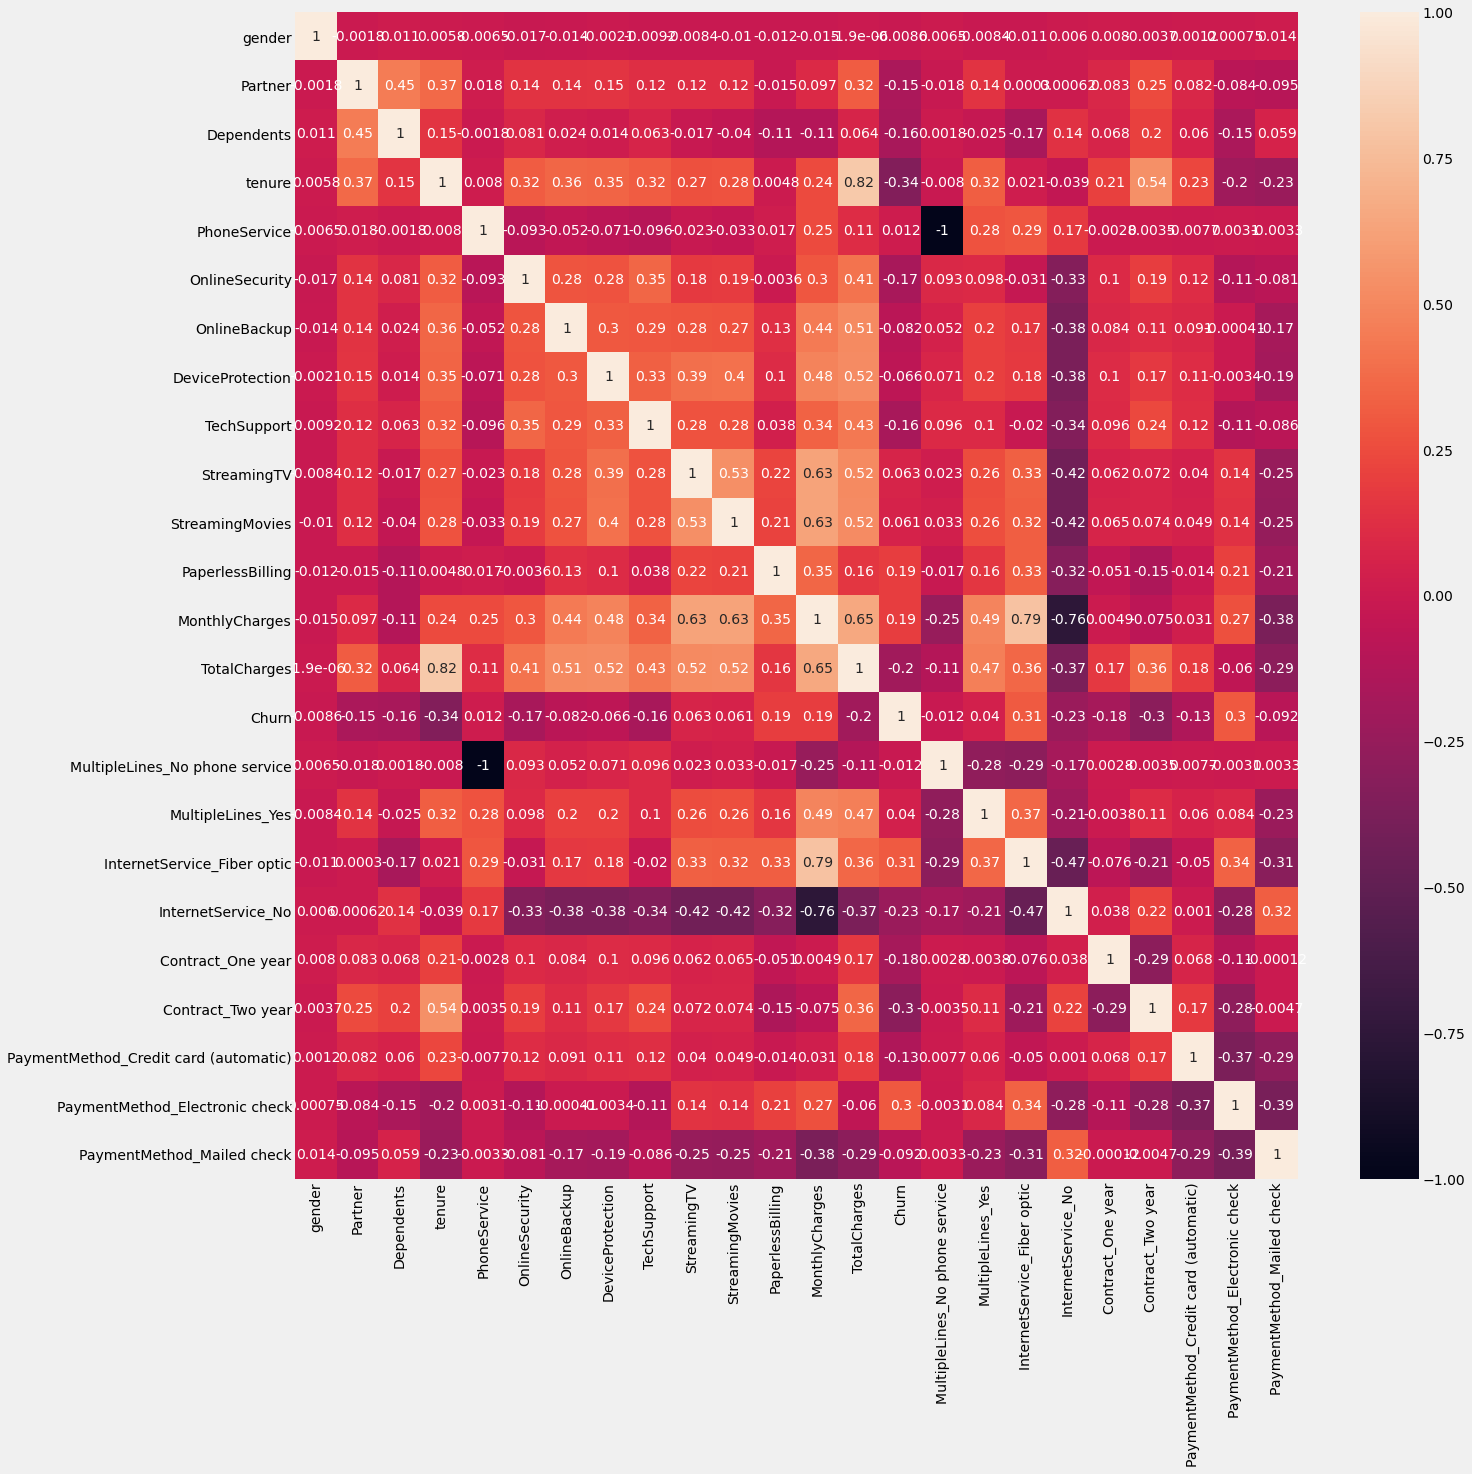

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True)
# Note Down : 
# sns.heatmap()

In [43]:
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,0,0,0,1,29.8500,29.8500,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,3,1,1,0,1,0,0,0,0,56.9500,1889.5000,0,0,0,0,0,1,0,0,0,1


<AxesSubplot:>

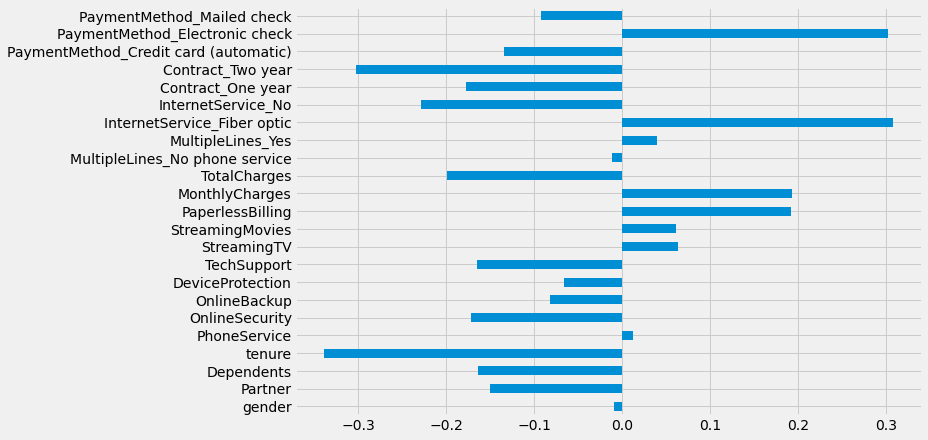

In [44]:
data1.drop('Churn',axis=1).corrwith(data1.Churn).plot(kind='barh',figsize=(10,7))
# - write down interesting analysis from here 

# Data preprocessing : 
 - I have to remove the unique identifiers from my data . as they server no value in modelling - pending - Completed . 
 - Create Train and test data sets . Splitting for modelling and testing samples 
 - Transform my features on same scale - ( normalize them or standardize them )
 - start with my base model 
 - other algorithms i have to try and benchamarm with my model

In [45]:
data1.drop('customerID',axis=1,inplace=True)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [47]:
X=data1.drop('Churn',axis=1)
y=data1['Churn']

In [48]:
X.shape

(7043, 24)

In [49]:
y.shape

(7043,)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
scaler=MinMaxScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)
x_std=scaler.transform(X)

In [52]:
# Fix our metric : 
#  - accuracy score : 

In [53]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [54]:
def evaluate(model,X_train,X_test,y_train,y_test):
    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    
    print("Training result ===>>>>>>>>>>>")
    clf_report=pd.DataFrame(classification_report(y_train,y_train_pred,output_dict=True))
    print(f"Confusion matrix is : \n {confusion_matrix(y_train,y_train_pred)}")
    print(f"Accuracy Score  is : \n  {accuracy_score(y_train,y_train_pred)}")
    print(f"classification_report  is : \n {clf_report}")
    
    
    print("Test result ===>>>>>>>>>>>")
    clf_report=pd.DataFrame(classification_report(y_test,y_test_pred,output_dict=True))
    print(f"Confusion matrix is : \n {confusion_matrix(y_test,y_test_pred)}")
    print(f"Accuracy Score  is : \n  {accuracy_score(y_test,y_test_pred)}")
    print(f"classification_report  is : \n {clf_report}")

In [55]:
## baseline model building : 

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr_classifier=LogisticRegression(solver='liblinear',penalty='l1')
lr_classifier.fit(X_train_std,y_train)
evaluate(lr_classifier,X_train_std,X_test_std,y_train,y_test)

Training result ===>>>>>>>>>>>
Confusion matrix is : 
 [[3267  368]
 [ 618  677]]
Accuracy Score  is : 
  0.8
classification_report  is : 
                   0         1  accuracy  macro avg  weighted avg
precision    0.8409    0.6478    0.8000     0.7444        0.7902
recall       0.8988    0.5228    0.8000     0.7108        0.8000
f1-score     0.8689    0.5786    0.8000     0.7238        0.7926
support   3635.0000 1295.0000    0.8000  4930.0000     4930.0000
Test result ===>>>>>>>>>>>
Confusion matrix is : 
 [[1383  156]
 [ 249  325]]
Accuracy Score  is : 
  0.808329389493611
classification_report  is : 
                   0        1  accuracy  macro avg  weighted avg
precision    0.8474   0.6757    0.8083     0.7616        0.8008
recall       0.8986   0.5662    0.8083     0.7324        0.8083
f1-score     0.8723   0.6161    0.8083     0.7442        0.8027
support   1539.0000 574.0000    0.8083  2113.0000     2113.0000


In [58]:
# Analysis Section on threshold on baseline models : 
#  - Our accuracy on baseline Logit model is 80% . 
#  - Since out model is to predict 1's , we need to work on better model , to increase the accruacy for 1's prediction.

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
scores=cross_val_score(lr_classifier,x_std,y,cv=3,scoring='f1')
print(scores)
print(f"logistic regression F1 score is :{scores.mean()*100 }% " )

[0.57904085 0.58701299 0.58635961]
logistic regression F1 score is :58.413781662101826% 


In [61]:
from sklearn.metrics import plot_confusion_matrix  , plot_roc_curve
pd.set_option('display.float_format', lambda x: '%.2f' % x)

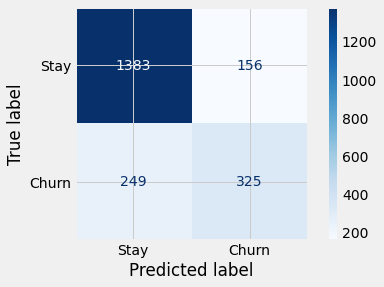

In [62]:
dist=plot_confusion_matrix(lr_classifier,X_test_std,y_test,cmap='Blues',display_labels=['Stay','Churn'],values_format='d')

# Random Forest Classifier : 
- bagging algorithm : 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rand_forest=RandomForestClassifier(n_estimators=300)
rand_forest.fit(X_train,y_train)
evaluate(rand_forest,X_train,X_test,y_train,y_test)

Training result ===>>>>>>>>>>>
Confusion matrix is : 
 [[3630    5]
 [   3 1292]]
Accuracy Score  is : 
  0.9983772819472616
classification_report  is : 
                 0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3635.00 1295.00      1.00    4930.00       4930.00
Test result ===>>>>>>>>>>>
Confusion matrix is : 
 [[1403  136]
 [ 304  270]]
Accuracy Score  is : 
  0.7917652626597255
classification_report  is : 
                 0      1  accuracy  macro avg  weighted avg
precision    0.82   0.67      0.79       0.74          0.78
recall       0.91   0.47      0.79       0.69          0.79
f1-score     0.86   0.55      0.79       0.71          0.78
support   1539.00 574.00      0.79    2113.00       2113.00


In [65]:
# Tuning the model : 
 - n_estimators = [500,700,1000]
 - max_depth = [3,5,7,10,15,None]
 - min_samples_split=[2,3,10]
 - 

IndentationError: unexpected indent (<ipython-input-65-700e257c4b7d>, line 2)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rand_forest=RandomForestClassifier(n_estimators=600,
                                  criterion='entropy',
                                  max_depth=10,
                                  min_samples_leaf=3,
                                  min_samples_split=3)
rand_forest.fit(X_train,y_train)
evaluate(rand_forest,X_train,X_test,y_train,y_test)

In [ ]:
d1=plot_roc_curve(lr_classifier,X_test_std,y_test)
plot_roc_curve(rand_forest,X_test,y_test,ax=d1.ax_)

In [ ]:
X_train.loc[:,'SeniorCitizen'] = pd.to_numeric(X_train.loc[:,'SeniorCitizen'])
X_test.loc[:,'SeniorCitizen'] = pd.to_numeric(X_test.loc[:,'SeniorCitizen'])

In [ ]:
# XGBoost Clasifier : 
from xgboost import XGBClassifier
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)
evaluate(xgb_clf,X_train,X_test,y_train,y_test)

In [ ]:
xgb_clf = XGBClassifier(base_score=0.15, 
                        learning_rate=0.09, 
                        colsample_bylevel=0.85,
                        colsample_bynode=0.85, 
                        colsample_bytree=0.95,
                        n_estimators=100)
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)

In [ ]:
# Which feature was important 
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
feature_imp(df, model)